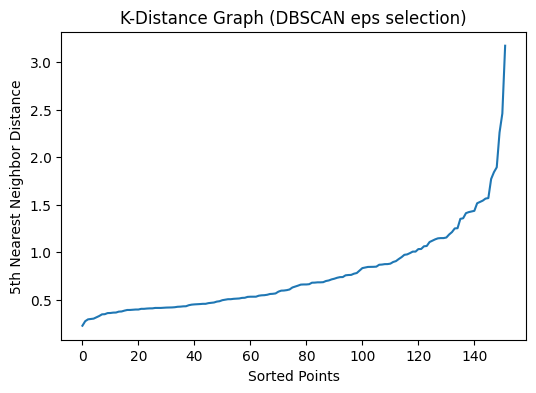

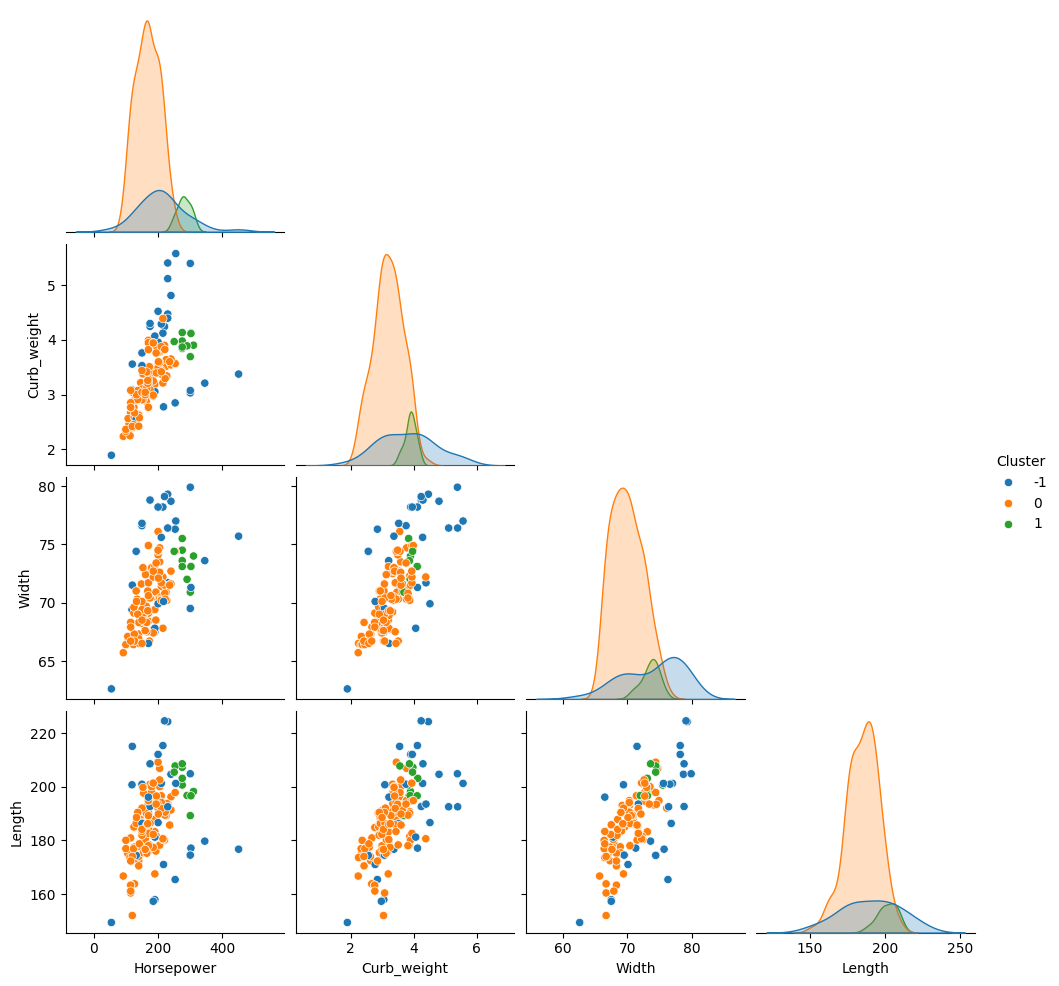

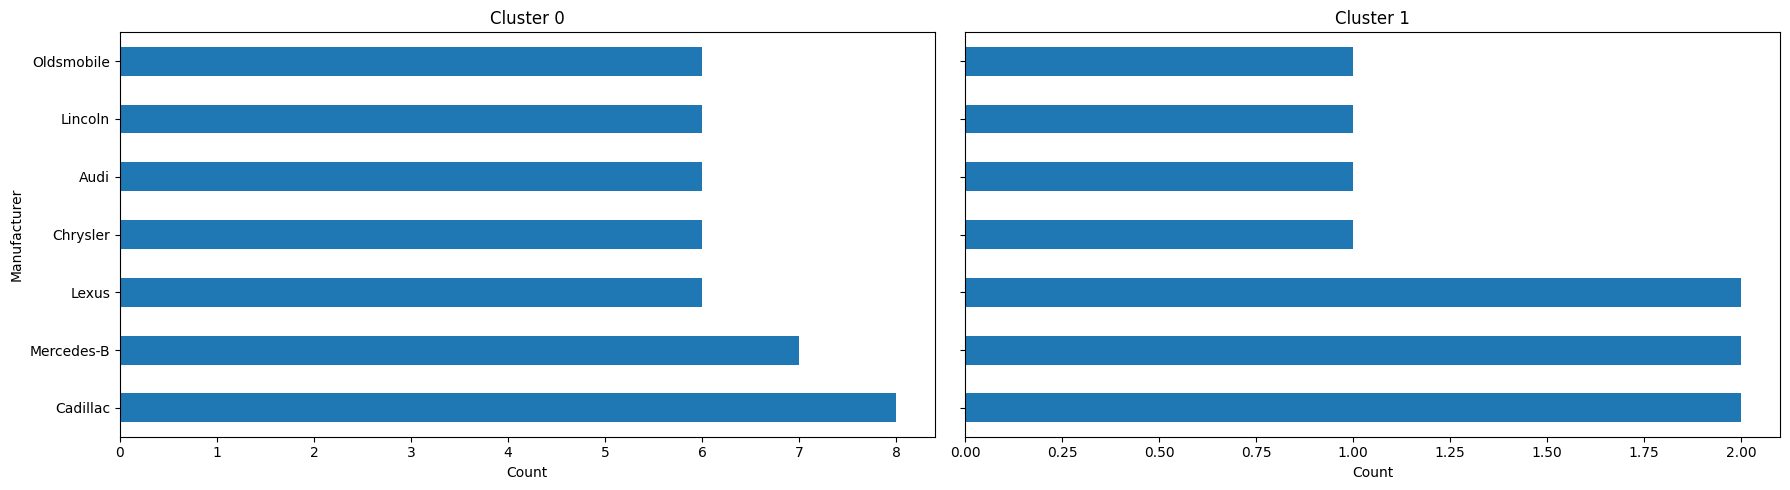

In [4]:
# ================================
# IMPORT LIBRARIES
# ================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# ================================
# LOAD DATA
# ================================
df = pd.read_csv("ML470_S7_Vehicle_Data_Practice.csv")

# ================================
# CLEAN DATA
# ================================
df.dropna(inplace=True)

# ================================
# SELECT NUMERICAL FEATURES
# ================================
features = [
    "Horsepower",
    "Curb_weight",
    "Width",
    "Length"
]

X = df[features]

# ================================
# SCALE FEATURES
# ================================
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ================================
# K-DISTANCE PLOT (IMAGE)
# ================================
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)
distances = np.sort(distances[:, 4])

plt.figure(figsize=(6, 4))
plt.plot(distances)
plt.title("K-Distance Graph (DBSCAN eps selection)")
plt.xlabel("Sorted Points")
plt.ylabel("5th Nearest Neighbor Distance")
plt.show()

# ================================
# APPLY DBSCAN
# ================================
dbscan = DBSCAN(
    eps=0.8,
    min_samples=5
)

df["Cluster"] = dbscan.fit_predict(X_scaled)

# ================================
# PAIRPLOT (IMAGE)
# ================================
sns.pairplot(
    df,
    vars=features,
    hue="Cluster",
    corner=True,
    palette="tab10"
)
plt.show()

# ================================
# MANUFACTURER DISTRIBUTION (IMAGE)
# ================================
valid_clusters = sorted(df["Cluster"].unique())
valid_clusters = [c for c in valid_clusters if c != -1]

fig, axes = plt.subplots(
    1,
    len(valid_clusters),
    figsize=(18, 5),
    sharey=True
)

for ax, c in zip(axes, valid_clusters):
    cluster_data = df[df["Cluster"] == c]
    cluster_data["Manufacturer"].value_counts().plot(
        kind="barh",
        ax=ax
    )
    ax.set_title(f"Cluster {c}")
    ax.set_xlabel("Count")

plt.tight_layout()
plt.show()
